# Predict housing prices in Melbourne

### Obtain the data

In [9]:
import arcgis
from arcgis import GIS

In [3]:
gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")

In [4]:
housing_data = gis.content.search('title: Melbourne Housing Market', 'Feature layer', outside_org=True)[0]

<Item title:"Melbourne Housing Market" type:Feature Layer Collection owner:demo_deldev>
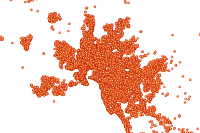

In [5]:
housing_data

In [6]:
housing_lyr = housing_data.layers[0]

In [10]:
arcgis.__version__

'1.5.1'

In [11]:
import pandas as pd
sdf = pd.DataFrame.spatial.from_layer(housing_lyr)

In [12]:
sdf.head()

,Address,Bathroom,Bedroom2,BuildingArea,Car,CouncilArea,Date,Distance,FID,Landsize,...,Postcode,Price,Propertycount,Regionname,Rooms,SHAPE,SellerG,Suburb,Type,YearBuilt
0,68 Studley St,1.0,2.0,None,1.0,Yarra City Council,03-09-2016,2.5,1,126.0,...,3067,NaN,4019,Northern Metropolitan,2,"{""x"": 16140858.623163335, ""y"": -4551408.157906...",Jellis,Abbotsford,h,NaN
1,85 Turner St,1.0,2.0,None,1.0,Yarra City Council,03-12-2016,2.5,2,202.0,...,3067,1480000.0,4019,Northern Metropolitan,2,"{""x"": 16141148.053839399, ""y"": -4551154.566602...",Biggin,Abbotsford,h,NaN
2,25 Bloomburg St,1.0,2.0,79,0.0,Yarra City Council,04-02-2016,2.5,3,156.0,...,3067,1035000.0,4019,Northern Metropolitan,2,"{""x"": 16140591.456385434, ""y"": -4552323.955738...",Biggin,Abbotsford,h,1900.0
3,18/659 Victoria St,2.0,3.0,None,1.0,Yarra City Council,04-02-2016,2.5,4,0.0,...,3067,NaN,4019,Northern Metropolitan,3,"{""x"": 16142617.471117867, ""y"": -4552817.111037...",Rounds,Abbotsford,u,NaN
4,5 Charles St,2.0,3.0,150,0.0,Yarra City Council,04-03-2017,2.5,5,134.0,...,3067,1465000.0,4019,Northern Metropolitan,3,"{""x"": 16140702.775876226, ""y"": -4552521.215052...",Biggin,Abbotsford,h,1900.0


In [13]:
sdf.columns

Index(['Address', 'Bathroom', 'Bedroom2', 'BuildingArea', 'Car', 'CouncilArea',
       'Date', 'Distance', 'FID', 'Landsize', 'Lattitude', 'Longtitude',
       'Method', 'Postcode', 'Price', 'Propertycount', 'Regionname', 'Rooms',
       'SHAPE', 'SellerG', 'Suburb', 'Type', 'YearBuilt'],
      dtype='object')

In [14]:
sdf.shape

(26881, 23)

In [15]:
sdf = sdf[sdf.Price.notnull()]

In [16]:
sdf.shape

(20993, 23)

In [17]:
sdf.columns

Index(['Address', 'Bathroom', 'Bedroom2', 'BuildingArea', 'Car', 'CouncilArea',
       'Date', 'Distance', 'FID', 'Landsize', 'Lattitude', 'Longtitude',
       'Method', 'Postcode', 'Price', 'Propertycount', 'Regionname', 'Rooms',
       'SHAPE', 'SellerG', 'Suburb', 'Type', 'YearBuilt'],
      dtype='object')

In [18]:
sdf.describe()

,Bathroom,Bedroom2,Car,Distance,FID,Landsize,Lattitude,Longtitude,Postcode,Price,Propertycount,Rooms,YearBuilt
count,20778.000000,20784.000000,20401.000000,20993.000000,20993.000000,17960.000000,20993.000000,20993.000000,20993.000000,2.099300e+04,20993.000000,20993.000000,12076.000000
mean,1.591298,3.046237,1.715259,11.359020,13443.965941,593.748719,-37.806963,144.996711,3114.630972,1.089746e+06,7516.751489,3.059163,1966.592001
std,0.700844,0.954948,0.994518,6.891418,7730.711620,3759.538783,0.091619,0.120680,114.810599,6.530283e+05,4411.397778,0.949881,36.752058
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-38.190430,144.423790,3000.000000,8.500000e+04,83.000000,1.000000,1196.000000
25%,1.000000,2.000000,1.000000,6.400000,6777.000000,219.000000,-37.860900,144.925300,3046.000000,6.570000e+05,4380.000000,2.000000,1950.000000
50%,1.000000,3.000000,2.000000,10.400000,13481.000000,512.000000,-37.800460,145.003200,3087.000000,9.100000e+05,6567.000000,3.000000,1970.000000
75%,2.000000,4.000000,2.000000,14.200000,20082.000000,664.000000,-37.748970,145.068770,3152.000000,1.335000e+06,10331.000000,4.000000,2000.000000
max,9.000000,20.000000,18.000000,48.100000,26881.000000,433014.000000,-37.397800,145.526350,3978.000000,1.120000e+07,21650.000000,16.000000,2019.000000


In [19]:
sdf.head()

,Address,Bathroom,Bedroom2,BuildingArea,Car,CouncilArea,Date,Distance,FID,Landsize,...,Postcode,Price,Propertycount,Regionname,Rooms,SHAPE,SellerG,Suburb,Type,YearBuilt
1,85 Turner St,1.0,2.0,None,1.0,Yarra City Council,03-12-2016,2.5,2,202.0,...,3067,1480000.0,4019,Northern Metropolitan,2,"{""x"": 16141148.053839399, ""y"": -4551154.566602...",Biggin,Abbotsford,h,NaN
2,25 Bloomburg St,1.0,2.0,79,0.0,Yarra City Council,04-02-2016,2.5,3,156.0,...,3067,1035000.0,4019,Northern Metropolitan,2,"{""x"": 16140591.456385434, ""y"": -4552323.955738...",Biggin,Abbotsford,h,1900.0
4,5 Charles St,2.0,3.0,150,0.0,Yarra City Council,04-03-2017,2.5,5,134.0,...,3067,1465000.0,4019,Northern Metropolitan,3,"{""x"": 16140702.775876226, ""y"": -4552521.215052...",Biggin,Abbotsford,h,1900.0
5,40 Federation La,2.0,3.0,None,1.0,Yarra City Council,04-03-2017,2.5,6,94.0,...,3067,850000.0,4019,Northern Metropolitan,3,"{""x"": 16140981.074603211, ""y"": -4550774.191233...",Biggin,Abbotsford,h,NaN
6,55a Park St,1.0,3.0,142,2.0,Yarra City Council,04-06-2016,2.5,7,120.0,...,3067,1600000.0,4019,Northern Metropolitan,4,"{""x"": 16140669.38002899, ""y"": -4552225.3274838...",Nelson,Abbotsford,h,2014.0


# Exploratory data analysis and visualization

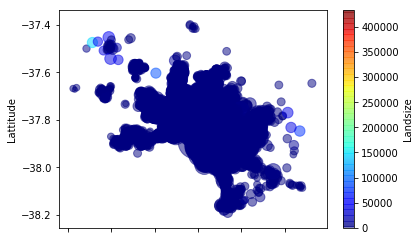

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
sdf.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.5, s=sdf["Price"]/10000,
         c="Landsize", cmap=plt.get_cmap("jet"))


In [21]:
import seaborn as sns

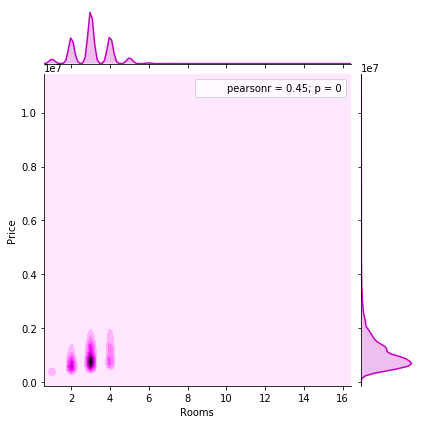

In [85]:
g = sns.jointplot(x=sdf.Rooms, y=sdf.Price, kind="kde", data=sdf, color="m")

In [29]:
sdf['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

[Text(0,0,'Northern Metropolitan'),
 Text(0,0,'Western Metropolitan'),
 Text(0,0,'Southern Metropolitan'),
 Text(0,0,'Eastern Metropolitan'),
 Text(0,0,'South-Eastern Metropolitan'),
 Text(0,0,'Eastern Victoria'),
 Text(0,0,'Northern Victoria'),
 Text(0,0,'Western Victoria')]

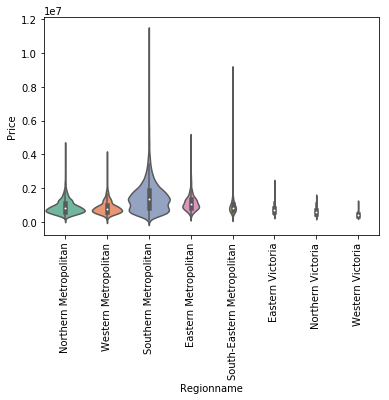

In [86]:
g = sns.violinplot(x=sdf.Regionname, y=sdf.Price, data=sdf, bw='silverman', width=1, scale="count",  palette="Set2", size=8);


g.set_xticklabels(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'],rotation=90)

[Text(0,0,'Northern Metropolitan'),
 Text(0,0,'Western Metropolitan'),
 Text(0,0,'Southern Metropolitan'),
 Text(0,0,'Eastern Metropolitan'),
 Text(0,0,'South-Eastern Metropolitan'),
 Text(0,0,'Eastern Victoria'),
 Text(0,0,'Northern Victoria'),
 Text(0,0,'Western Victoria')]

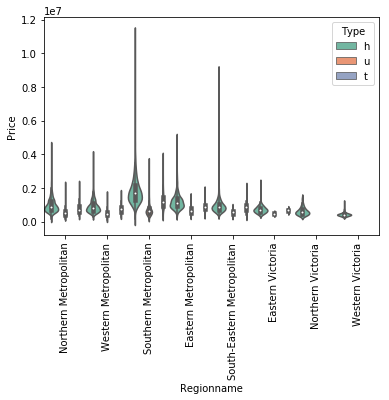

In [95]:
g = sns.violinplot(x=sdf.Regionname, y=sdf.Price,hue="Type", data=sdf, bw='silverman', width=1, scale="count",  palette="Set2");


g.set_xticklabels(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'],rotation=90)

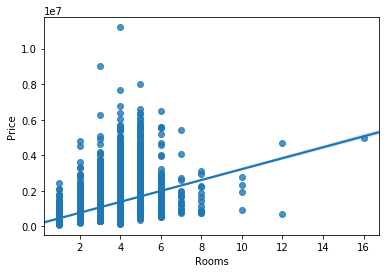

In [31]:
sns.regplot(x=sdf.Rooms, y=sdf.Price, data=sdf);

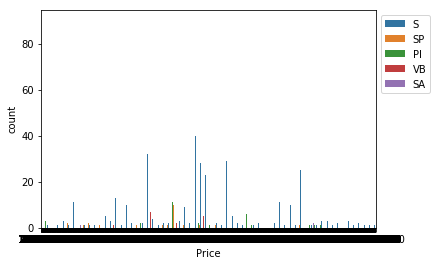

In [32]:
sns.countplot(x='Price', hue='Method', data=sdf)
plt.legend(bbox_to_anchor=(1,1))

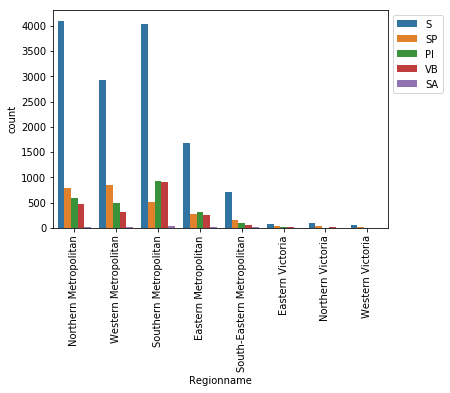

In [33]:
g = sns.countplot(x='Regionname', hue='Method', data=sdf)

g.set_xticklabels(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'],rotation=90)
plt.legend(bbox_to_anchor=(1,1))

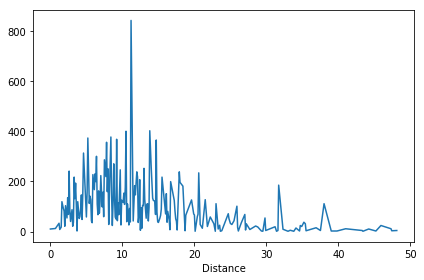

In [34]:
sdf.groupby(by='Distance').count()['Lattitude'].plot()
plt.tight_layout()

In [111]:
sdf.Landsize.max()

433014.0

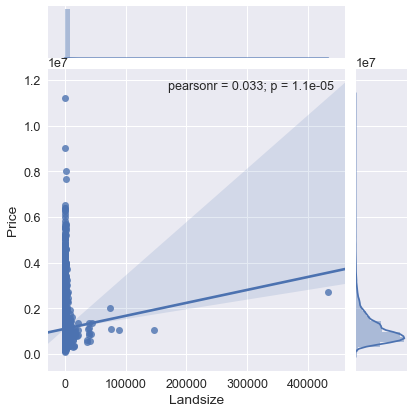

In [109]:
# Living Area vs Sale Price
sns.jointplot(x=sdf['Landsize'], y=sdf['Price'], kind='reg')

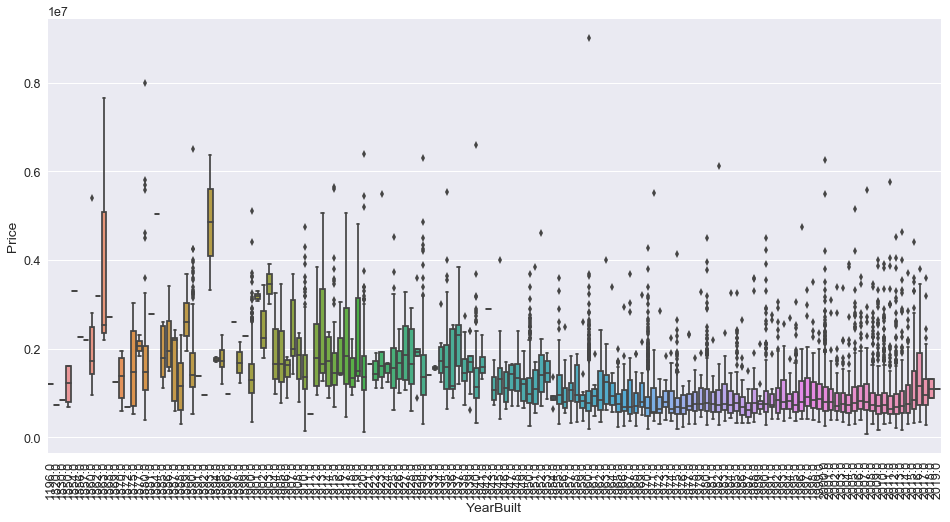

In [114]:
# Total Rooms vs Price
var = 'YearBuilt'
data = pd.concat([sdf['Price'], sdf[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Price", data=data);
plt.xticks(rotation=90);

# Predictive analysis

## Dataset with continuous values

In [35]:
cols = ['Bathroom', 'Bedroom2', 'BuildingArea', 'Distance', 'Landsize',
        'Lattitude', 'Longtitude', 'Rooms', 'YearBuilt', 'Price']

In [36]:
df = sdf[cols]

In [37]:
df.head()

,Bathroom,Bedroom2,BuildingArea,Distance,Landsize,Lattitude,Longtitude,Rooms,YearBuilt,Price
1,1.0,2.0,None,2.5,202.0,-37.7996,144.9984,2,NaN,1480000.0
2,1.0,2.0,79,2.5,156.0,-37.8079,144.9934,2,1900.0,1035000.0
4,2.0,3.0,150,2.5,134.0,-37.8093,144.9944,3,1900.0,1465000.0
5,2.0,3.0,None,2.5,94.0,-37.7969,144.9969,3,NaN,850000.0
6,1.0,3.0,142,2.5,120.0,-37.8072,144.9941,4,2014.0,1600000.0


## Deleting rows with nan price 

In [38]:
import numpy as np

In [39]:
sf = df[np.isfinite(df['Price'])]

In [40]:
sf.shape

(20993, 10)

## Dropping the target value

In [41]:
y = sf.Price

In [42]:
sf.drop('Price', inplace=True, axis=1)

## Imputing NaN values

In [43]:
import pandas as pd

In [44]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [45]:
imputer.fit(sf)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [46]:
sf.median().values

array([ 1.000000e+00,  3.000000e+00,  1.330000e+02,  1.040000e+01,
        5.120000e+02, -3.780046e+01,  1.450032e+02,  3.000000e+00,
        1.970000e+03])

In [47]:
transformed = imputer.transform(sf)

In [48]:
x = pd.DataFrame(transformed, columns=sf.columns,
                          index = list(sf.index.values))

In [49]:
x.head()

,Bathroom,Bedroom2,BuildingArea,Distance,Landsize,Lattitude,Longtitude,Rooms,YearBuilt
1,1.0,2.0,133.0,2.5,202.0,-37.7996,144.9984,2.0,1970.0
2,1.0,2.0,79.0,2.5,156.0,-37.8079,144.9934,2.0,1900.0
4,2.0,3.0,150.0,2.5,134.0,-37.8093,144.9944,3.0,1900.0
5,2.0,3.0,133.0,2.5,94.0,-37.7969,144.9969,3.0,1970.0
6,1.0,3.0,142.0,2.5,120.0,-37.8072,144.9941,4.0,2014.0


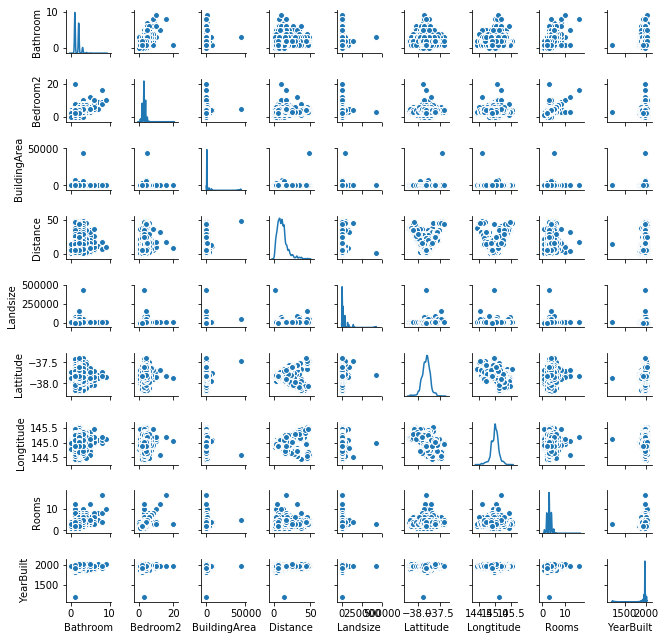

In [51]:
sns.pairplot(x, diag_kind="kde", size= 1)

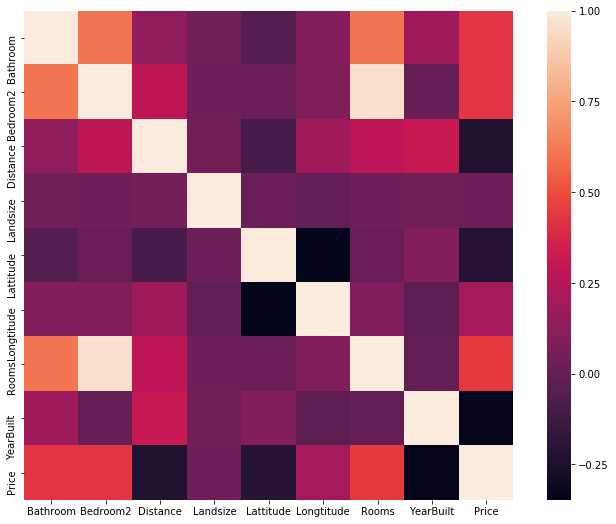

In [100]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

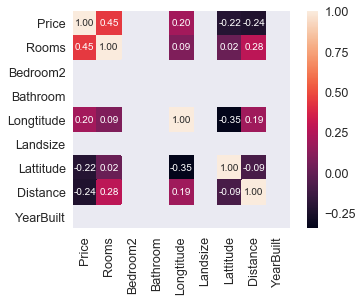

In [105]:
# Top 9 Heatmap
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [106]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,Price
1,Rooms
2,Bedroom2
3,Bathroom
4,Longtitude
5,Landsize
6,Lattitude
7,Distance
8,YearBuilt


## Feature scaling

In [52]:
x_scaled = (x-x.min())/(x.max()-x.min())

## Splitting train and test data

In [53]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(x_scaled, y, random_state=0)

In [54]:
len(train_X)

15744

In [55]:
len(train_y)

15744

In [56]:
len(test_X)

5249

In [57]:
len(test_y)

5249

## Training and testing model

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(max_leaf_nodes=500)
model.fit(train_X, train_y)
predicted = model.predict(test_X)
r2_score(test_y, predicted)

0.675420009243636

In [59]:
# mean absolute error for decisiontreeclassifier
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, predicted)

217955.3982564751

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest = forest_reg.fit(train_X, train_y)
Predicted = forest.predict(test_X)
r2_score(test_y, Predicted)

0.7662669244877467

In [61]:
# mean absolute error for RandonForestRegressor
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, Predicted)

183702.27574231825

2. Run prediction with categorical columns by making dummies.

In [62]:
columns = ['Bathroom', 'Bedroom2', 'Distance', 'Landsize',
        'Lattitude', 'Longtitude', 'Rooms', 'Price', 'Regionname', 'Method']

In [63]:
dt = sdf[columns]

In [64]:
len(dt)

20993

In [65]:
dt.isnull().sum()

Bathroom       215
Bedroom2       209
Distance         0
Landsize      3033
Lattitude        0
Longtitude       0
Rooms            0
Price            0
Regionname       0
Method           0
dtype: int64

In [66]:
dd = dt[np.isfinite(dt['Price'])]

In [67]:
dd.shape

(20993, 10)

In [68]:
corr_matrix = dd.corr()

corr_matrix['Price'].sort_values()

Distance     -0.235394
Lattitude    -0.215607
Landsize      0.032734
Longtitude    0.197874
Bathroom      0.430088
Bedroom2      0.430289
Rooms         0.446781
Price         1.000000
Name: Price, dtype: float64

In [69]:
Y = dd.Price

In [70]:
dd.drop('Price', inplace=True, axis=1)

## Replacing nan values with median

In [71]:
dd_num = dd.drop(['Method','Regionname'], axis=1)

In [72]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [73]:
imputer.fit(dd_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [74]:
transformed = imputer.transform(dd_num)

In [75]:
X_transfomed = pd.DataFrame(transformed, columns=dd_num.columns,
                          index = list(dd_num.index.values))

In [76]:
X = pd.concat([X_transfomed, dd[['Method','Regionname']]], axis=1)

In [77]:
X.isnull().sum()

Bathroom      0
Bedroom2      0
Distance      0
Landsize      0
Lattitude     0
Longtitude    0
Rooms         0
Method        0
Regionname    0
dtype: int64

## Create dummies for categorical data

In [78]:
X_dummy = pd.get_dummies(X)

## Feature scaling

In [79]:
X_scaled = (X_dummy-X_dummy.min())/(X_dummy.max()-X_dummy.min())

## Splitting train and test data

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

## Training and testing

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(max_leaf_nodes=500)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
r2_score(y_test, predicted)

0.6602360291353416

In [82]:
# mean_absolute_error for DecissiontreeRegressor
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, Predicted)

620395.1176296618

In [83]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest = forest_reg.fit(x_train, y_train)
Predicted = forest.predict(x_test)
r2_score(y_test, Predicted)

0.7497282160071781

In [84]:
# mean_absolute_error for RandomForestRegressor
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, Predicted)

188229.64959674858